In [15]:
!pip install sep astropy matplotlib

I had a lot of trouble directly taking the file from my storage through the script so I ended up using the file upload function instead.

In [19]:
from google.colab import files

# Upload file (select your image.fits file)
uploaded = files.upload()


Saving image.fits to image (2).fits


In [20]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from astropy.io import fits

# Load uploaded FITS file
fits_file = next(iter(uploaded))
with fits.open(fits_file) as hdul:
    data = hdul[0].data.astype(np.float32)  # Convert to float32

# View dimensions
print("Image shape:", data.shape)

Image shape: (256, 256)


In [9]:
# Estimate background and subtract it
bkg = sep.Background(data)

# Subtract background
data_sub = data - bkg

# Extract sources from background-subtracted image
objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)

print(f"Detected {len(objects)} sources.")

Detected 69 sources.


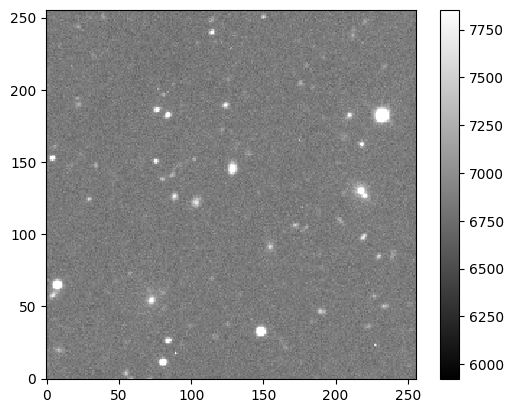

In [22]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [23]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [25]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [26]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

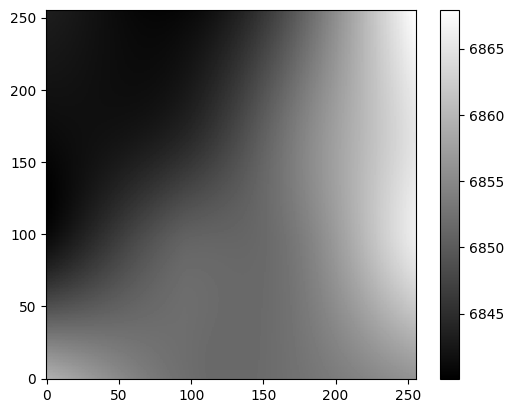

In [27]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [28]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

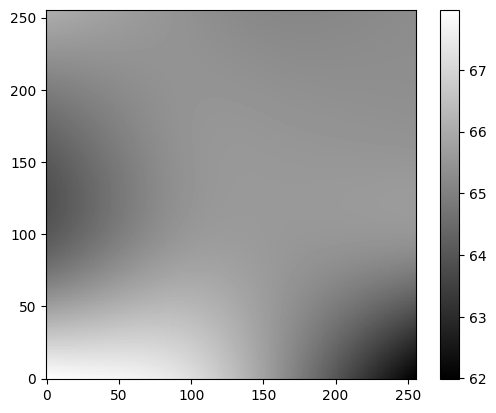

In [29]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

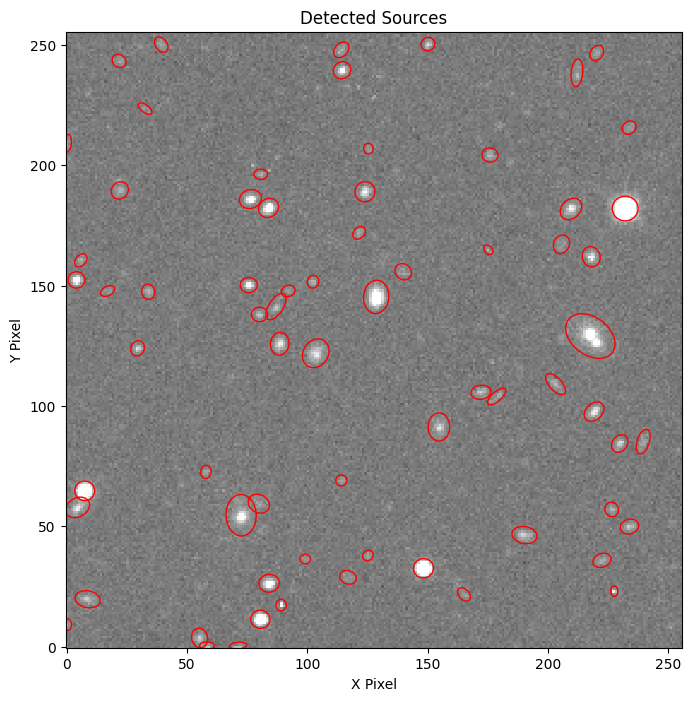

In [11]:
# Plot sources on top of subtracted image
fig, ax = plt.subplots(figsize=(10, 8))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m - s, vmax=m + s, origin='lower')

# Draw ellipses for each source
for obj in objects:
    e = plt.matplotlib.patches.Ellipse(
        xy=(obj['x'], obj['y']),
        width=6 * obj['a'],
        height=6 * obj['b'],
        angle=obj['theta'] * 180. / np.pi,
        edgecolor='red',
        facecolor='none',
        linewidth=1)
    ax.add_patch(e)

plt.title("Detected Sources")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

In [13]:
files.download("original_image.png") # Saves all the files as a PNG
files.download("background_model.png")
files.download("background_subtracted.png")
files.download("detected_sources.png")

FileNotFoundError: Cannot find file: original_image.png